# Assignment 4: Classification
## BUS 20800: Big Data
## Due: Feb 5th before class, 2023

**Contributions:** Shivani did 1.1 and Monica did 1.2. Dario did Problem 2 and Alberto reviewed over everything and revised some of the explanations for Problem 1.

---

In [1]:
# Set up codes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
import random

import math

import warnings
warnings.filterwarnings('ignore')

## Problem 1. Curse of Dimensionality

### Problem 1.1 Understanding distance in high dimension

K-nn breaks down in high dimensions, and the phenomenon is commonly referred to as the curse of dimensionality (Bellman, 1961).

In this example, we will do some calculation and simulation experiment to help you understand the intuition.

Consider the nearest-neighbor procedure for inputs uniformly distributed
in a p-dimensional unit hypercube. Suppose we use a hypercubical neighborhood about a target point to capture a fraction r of the observations. 

Since this corresponds to a fraction r of the unit volume, what will the length of 
the expected edge $e_p \ (r)$ will be ? 

<img src="knn.png" alt="Drawing" style="width: 300px;" align="center"/>




**Answer**:


$e_p \ (r)$ = $r^\frac{1}{p}$

Now let's fix r at 0.1, and set p =[1,2,3,5,10,100] calculate $e_p\ (r)$ numerically, respectively. What conclusions can you make?

**Answer**:

$e_{p=1} \ (0.1)$ = $0.1^\frac{1}{1} = 0.1$ <br>
$e_{p=2} \ (0.1)$ = $0.1^\frac{1}{2} = 0.316$ <br>
$e_{p=3} \ (0.1)$ = $0.1^\frac{1}{3} = 0.464$ <br>
$e_{p=5} \ (0.1)$ = $0.1^\frac{1}{5} = 0.631$ <br>
$e_{p=10} \ (0.1)$ = $0.1^\frac{1}{10} = 0.794$ <br>
$e_{p=100} \ (0.1)$ = $0.1^\frac{1}{100} = 0.977$ <br>

We can see here that even as the fraction of the unit volume remains small, an increase in dimensionality means an increase in edge size p. This indicates that for larger dimensions, each variable parameter must still be set to a very large range to capture some neighbors. With higher dimensions, we have to cover a large neighborhood to find even a small value k neighbors, contradicting the whole idea of "neighbors".

Now let's fix p at 10, and set r = [0.1,0.2,...,0.6], calculate $e_p \ (r)$ numerically, respectively. What conclusions can you draw?

**Answer**:

$e_{p=10} \ (0.1)$ = $0.1^\frac{1}{10} = 0.794$ <br>
$e_{p=10} \ (0.2)$ = $0.2^\frac{1}{10} = 0.851$ <br>
$e_{p=10} \ (0.3)$ = $0.3^\frac{1}{10} = 0.887$ <br>
$e_{p=10} \ (0.4)$ = $0.4^\frac{1}{10} = 0.912$ <br>
$e_{p=10} \ (0.5)$ = $0.5^\frac{1}{10} = 0.933$ <br>
$e_{p=10} \ (0.6)$ = $0.6^\frac{1}{10} = 0.950$ <br>

Here we can see a similar phenomenon. Even for very small r values, $e_p \ (r)$ is relatively large, meaning that there p has to cover a large range. This shows that again with high dimensionality the idea of "neighbors" is rendered practically obsolete.

Now let's formalize the above findings and run the following simulation experiment. 
Save your results in a dataframe called "Distance" below.

Set the index as the sequence of r and columns the sequence of p.

In [2]:
# Simulation experiment
p_seq = [1,2,3,5,10,100]
r = np.linspace(0,0.6,1000)

In [3]:
##############################################################################
### TODO: Calculate the expected edge e_p(r)                              ###
##############################################################################
Distance = pd.DataFrame()
    
# Calculate e_p(r) for each p in p_seq and store in the DataFrame
for p in p_seq:
    Distance[f'p={p}'] = r ** (1/p)

# Set r as the index of the DataFrame
Distance.index = r
Distance.index.name = 'r'
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################

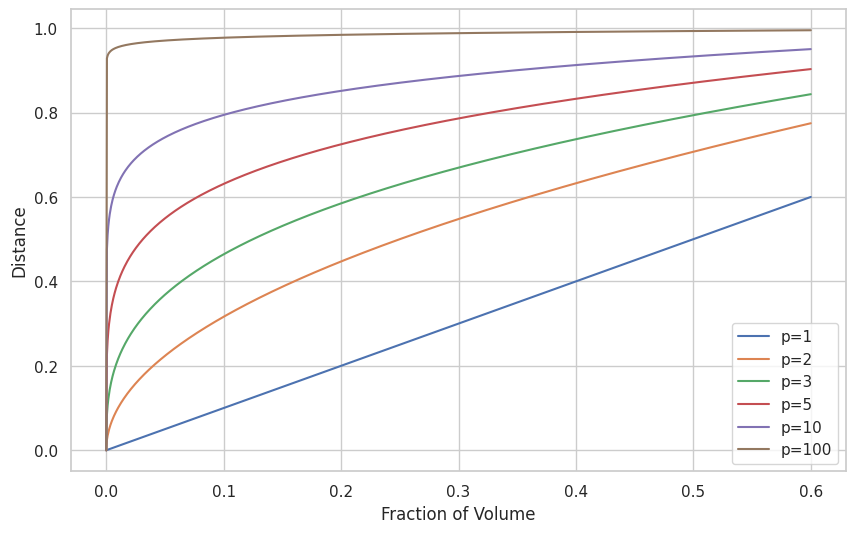

In [4]:
# Visualize your results
Distance.plot(figsize = (10,6))
plt.ylabel('Distance')
plt.xlabel('Fraction of Volume')
plt.show()

### Problem 1.2 K-nn in high dimension

Recall the essence of K-nn:

1. We assume the point's label is similar to its neighbours.
2. We need to have a good measure of distance.

From Problem 1.1, we can see that in a unit hypercube, even though we want to cover a small fraction of its volume, the expected edge $e_r \ (p)$ is no longer small. Hence, the points we need to cover are no longer 'local'. This might result in the failure of K-nn. 

Let's see this in the following simulation experiment.


### Experiment Setup

Suppose we have 1000 training examples $X_i$ generated uniformly on $[−1, 1]^p$. Assume that the true relationship between $X$ and $Y$ is

$$
Y = f(X) = e^{−8||X||^{2}}
$$

without any measurement error.

We use the 1-nn rule to predict $y_0$ at the test-point $X_{0} = 0$, and the true value of Y should be 1.

In [5]:
##############################################################################
### TODO: Calculate Y based on x input.                                    ###
##############################################################################
def f(x):
    norm_x_squared = np.linalg.norm(x) ** 2
    y = np.exp(-8 * norm_x_squared)
    return y 

f(0)

1.0

### DGP

Run the following cell to generate the simulated data. You don't need to modify any codes here.

In [6]:
def Generate_data(p):
    n_sample = 1000
    X = np.random.uniform(-1,1,(n_sample,p)).squeeze()
    
    return [f(x) for x in X]

Let's first visualize the results in 1-dimension and 2-dimension. After you finish the above codes, you can directly run the following codes. You don't need to modify any codes here.

### 2D Visualization for 1-dimensional X

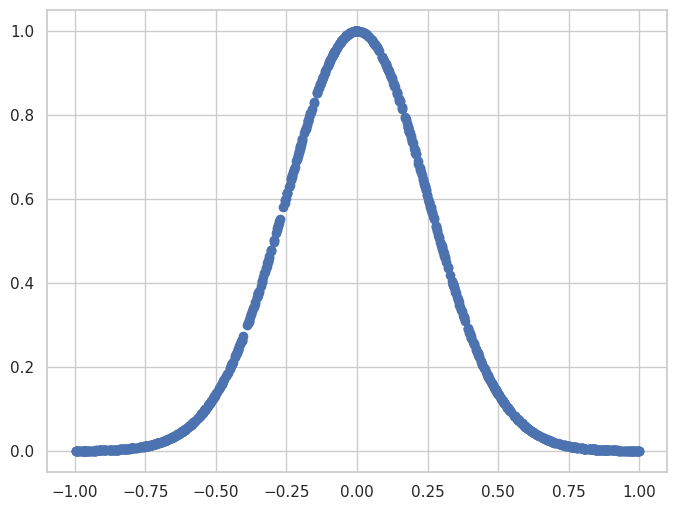

In [7]:
p = 1
n_sample = 1000
X = np.random.uniform(-1,1,(n_sample,p)).squeeze()
y = [f(x) for x in X]

plt.figure(figsize = (8,6))
plt.plot(X,y,'o')

### 3D Visualization for 2-dimensional X

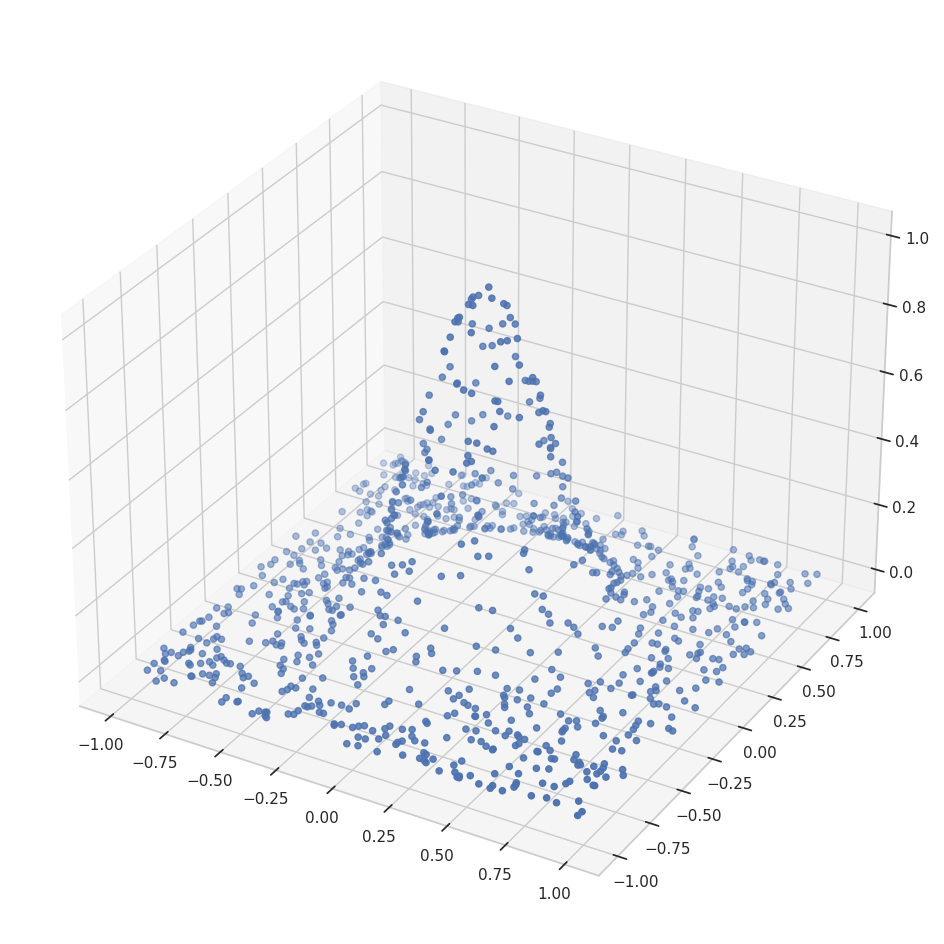

In [8]:
from mpl_toolkits.mplot3d import Axes3D

p = 2
X = np.random.uniform(-1,1,(n_sample,p)).squeeze()

fig = plt.figure(figsize = (12,12))
ax1 = plt.axes(projection='3d')

z = [f(x) for x in X]
x = X[:,0]
y = X[:,1]

ax1.scatter3D(x,y,z, cmap='Blues') 
plt.show()

### K-nn and MSE

Now set the dimension $p = [1,2,...,20]$, run this DGP 500 times and claculate the MSE $\frac{1}{500}\sum_{i=1}^{500} (1 - \widehat{f}(x_i))^2$ for 1-nn for each $p$, where $x_i$ is the closest point to the origin in each simulation. Visulize the MSE with respect to dimension $p$, and make comments on this graph. What did you find?

Text(0.5, 1.0, 'MSE vs Dimension p')

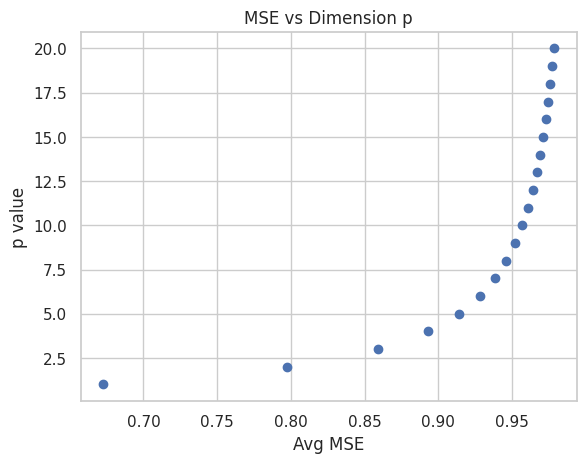

In [9]:
from sklearn.neighbors import NearestNeighbors

result = []
error = []
p_range = range(1,21)
for p in p_range:
    for iter in range(1, 501):
        # Generate random point in p-dimensional space
        x = np.random.normal(0, 1, p)
        
        # Reshape x for compatibility with NearestNeighbors
        x = x.reshape(1, -1)
        
        # Fit 1-nearest neighbor model
        nn_model = NearestNeighbors(n_neighbors=1)
        nn_model.fit(x)
        
        # Find closest point to the origin
        closest_point_index = nn_model.kneighbors([[0] * p], return_distance=False)[0][0]
        closest_point = x[closest_point_index]
        
        # Compute predicted value and MSE
        y_hat = f(x)
        mse = (1 - y_hat) ** 2
        error.append(mse)
    
    # Calculate average MSE for current dimension
    avg_mse = np.mean(error)
    result.append(avg_mse)  

plt.scatter(result, p_range)
plt.xlabel('Avg MSE')
plt.ylabel('p value')
plt.title('MSE vs Dimension p')

**Answer**: As p and thus the dimensions increase, the MSE increases. This is due to the curse of dimensionality, which explains that as data becomes more multi-dimensional, it is easier for a model to overfit or be unable to identify clear patterns, thus increasing the MSE.

## Problem 2: Face completion

In this exerceise, we compare different methods on the task of face completion. The goal is to predict the lower half of a face given its upper half using different algorithm.

### Part 2.1 Data preprocessing

In this dataset, we have 40 people each with 10 different facial photographs (400 graphs in total). And each graph's pixels are in 64 $\times$ 64 dimension.


Run the following cells and load the face dataset. You can see the data descriprion as below, and you don't need to modify any codes here.



+ data   : flattened vector of these images, dimension 400 $\times$ 4096.
+ target : label of each person, from 0-39, 40 classes in total.

In [10]:
# Load the faces datasets

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

data, targets = fetch_olivetti_faces(return_X_y=True)

In [11]:
# Train test set split
# Use the first 30 people as our training set, and the last 10 as ouur testing data.

train = data[targets < 30]
test = data[targets >= 30]  

In [12]:
# Choose 5 graphs from the total test set for visualization purpose. These are five full faces.

n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

Run the following cells to visualize the true face.

In [13]:
# Seperate each graph into the upper half and lower half.

n_pixels = data.shape[1]
X_train = train[:, : (n_pixels + 1) // 2]
y_train = train[:, n_pixels // 2 :]

X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

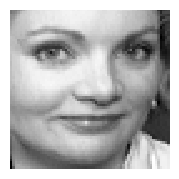

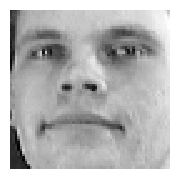

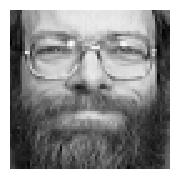

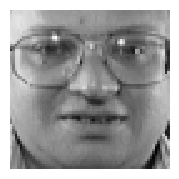

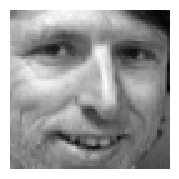

In [14]:
image_shape = (64, 64)
for i in range(1,6):
    plt.figure(figsize = (12,12))
    plt.subplot(5,1,i)
    true_face = np.hstack((X_test[i-1], y_test[i-1]))
    plt.axis("off")
    plt.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

### Part 2.2 Model training

In this section, you will compare the results of K-nn, linear regression, and ridge. Note that this is a multi-dimensional regression problem, where each pixel in the lower half the image is a y variable that you need run regression with. In other words, the y variable is a matrix. 

In [15]:
# Fit estimators and store the information in a dictionary structure dataframe.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

ESTIMATORS = {
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV()
}

y_test_predict = dict()

Finish your codes in the following cells. You need to finish the training procedure for K-nn, linear regression and ridge. And use these models to get OOS prediction.

In [16]:
##############################################################################
### TODO: Fit K-nn, linear regression and ridge, and get OOS prediction    ###
##############################################################################

for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)


##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################


### Part 2.3 Visualization

Run the following cells to visualize the facial prediction. You don't need to modify any codes here.

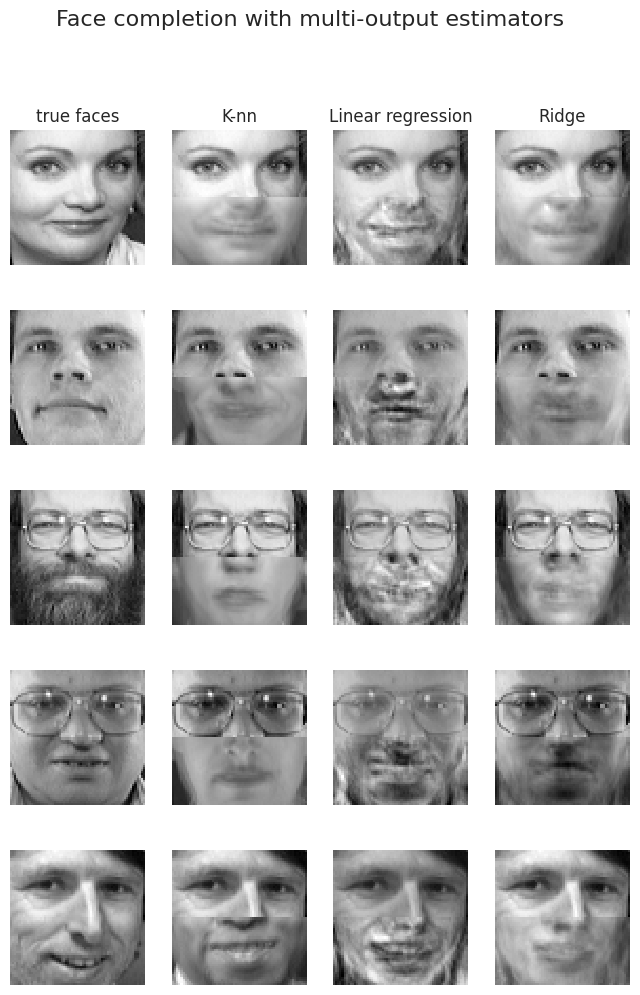

In [17]:
# Plot the completed faces

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()